# Prueba de los mejores modelos usando el conjunto de validación para R1

## Librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import joblib


## Lectura del dataframe del conjunto de validación

In [2]:
df = pd.read_csv('../data/r1/r1_val.csv', sep='|')

df.head()

,g45µ,sba,pf,so3,mgo,sio2,fe2o3,caot,al2o3,na2o,k2o,r1_iram1622
0,-0.282883,-0.596372,-0.802094,-0.780747,0.241156,0.815933,-1.461318,-1.364374,1.639253,1.046363,0.650091,21.0
1,-0.662113,1.912959,-1.007153,-0.122094,0.585426,0.790110,0.680253,-1.732918,0.039145,0.657499,-0.265897,17.7
2,-0.207037,-0.094506,1.020647,-0.028001,0.470669,-1.112227,-0.376978,0.724041,-1.130164,0.268635,-0.189565,22.2
3,0.968574,-0.245066,0.826981,1.477492,0.241156,-1.258560,1.249531,1.051636,-2.422559,-0.897956,-0.571227,15.4
4,0.380768,-0.295252,-1.257780,1.007025,-0.619521,1.211895,-0.105893,-1.384848,0.818685,0.851931,-0.291341,20.3


## Conjuntos X y Y para validación

In [3]:
X_val = df.drop(columns=['r1_iram1622'])
y_val = df['r1_iram1622']

## Carga de los modelos

In [4]:
model_rmse_path = '../model/r1_models/r1_best_model_rmse.joblib'
model_mae_path = '../model/r1_models/r1_best_model_mae.joblib'
model_r2_path = '../model/r1_models/r1_best_model_r2.joblib'

model_rmse = joblib.load(model_rmse_path)
model_mae = joblib.load(model_mae_path)
model_r2 = joblib.load(model_r2_path)

## Predicciones con cada modelo

In [5]:
y_val_pred_rmse = model_rmse.predict(X_val)
y_val_pred_mae = model_mae.predict(X_val)
y_val_pred_r2 = model_r2.predict(X_val)

## Gráficas de comparación de los valores reales vs predichos

### Métrica RMSE

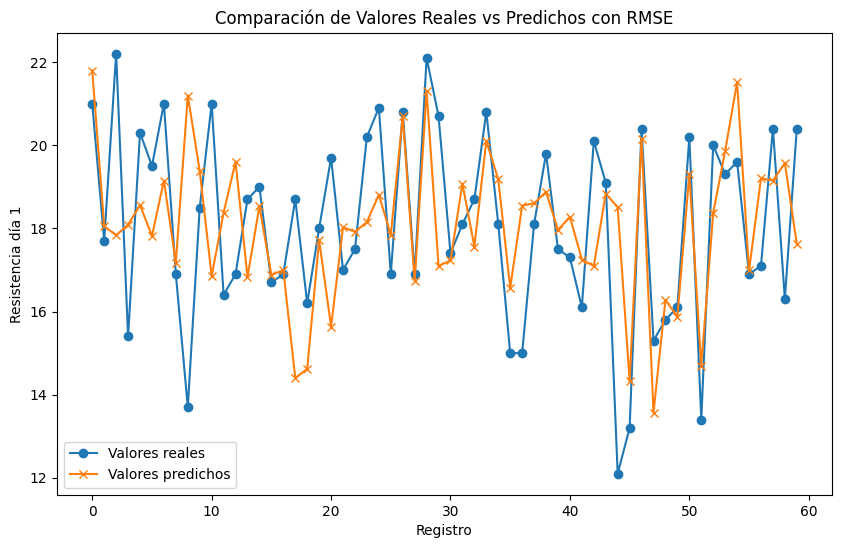

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_rmse, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con RMSE")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 1")
plt.legend()
plt.show()

### Métrica MAE

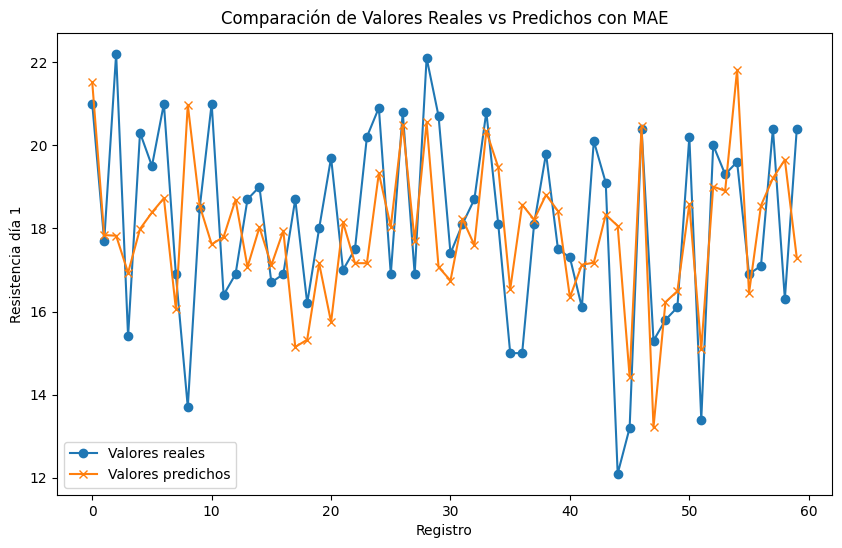

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_mae, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con MAE")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 1")
plt.legend()
plt.show()

### Métrica R²

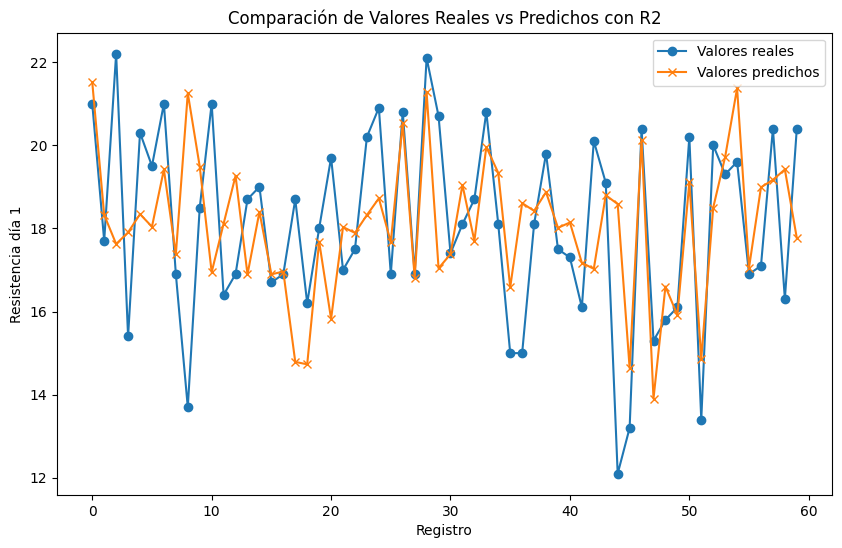

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_r2, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con R2")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 1")
plt.legend()
plt.show()

## Distribución de los conjuntos para R1

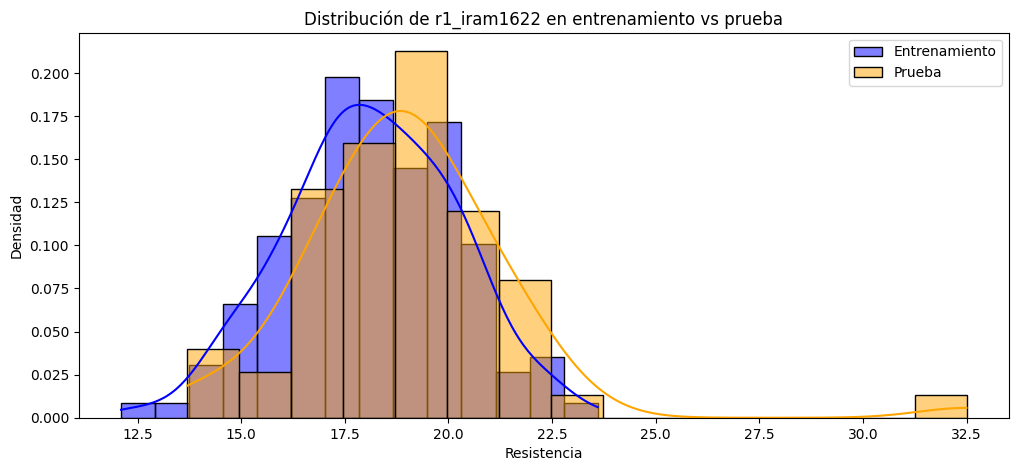

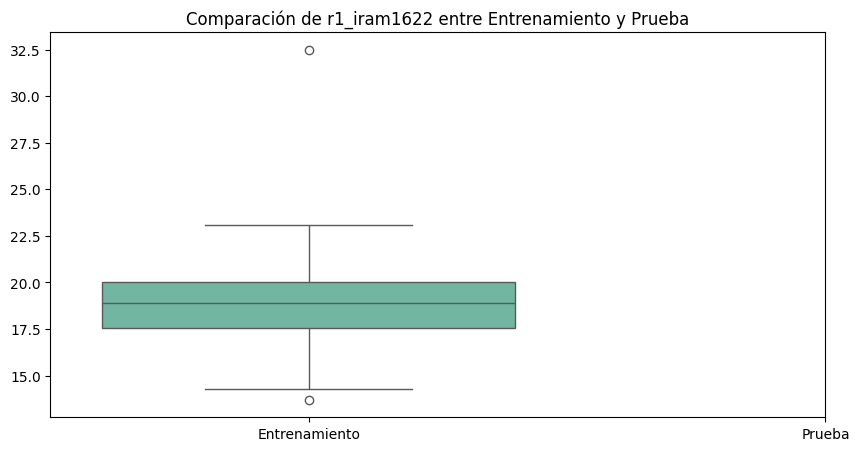

In [9]:
train_data = pd.read_csv('../data/r1/r1_train.csv', sep='|')
test_data = pd.read_csv('../data/r1/r1_test.csv', sep='|')

column = 'r1_iram1622'

# Histograma
plt.figure(figsize=(12, 5))
sns.histplot(train_data[column], color='blue', label='Entrenamiento', kde=True, stat="density")
sns.histplot(test_data[column], color='orange', label='Prueba', kde=True, stat="density")
plt.xlabel("Resistencia")
plt.ylabel("Densidad")
plt.legend()
plt.title(f'Distribución de {column} en entrenamiento vs prueba')
plt.show()

# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=[train_data[column], test_data[column]], palette="Set2")
plt.xticks([0, 1], ['Entrenamiento', 'Prueba'])
plt.title(f'Comparación de {column} entre Entrenamiento y Prueba')
plt.show()

## Resumen de las estadísticas de los conjuntos de entrenamiento y prueba

In [10]:
# Estadísticas resumen para el conjunto de entrenamiento
print("Estadísticas del conjunto de entrenamiento:\n", train_data.describe())

# Estadísticas resumen para el conjunto de prueba
print("Estadísticas del conjunto de prueba:\n", test_data.describe())

Estadísticas del conjunto de entrenamiento:
              g45µ         sba          pf         so3         mgo        sio2  \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     0.020432   -0.172957    0.349375    0.038578   -0.200057   -0.448427   
std      0.950674    1.033415    1.007750    0.814701    0.767837    0.932758   
min     -2.292799   -4.460742   -1.383093   -2.098053   -4.349119   -2.024660   
25%     -0.605228   -0.847305   -0.733741   -0.404374   -0.791656   -1.155266   
50%     -0.093268   -0.245066    0.838373   -0.028001   -0.103115   -0.879815   
75%      0.494537    0.457547    1.191529    0.536559    0.470669    0.385541   
max      2.826798    3.518930    3.811720    3.641637    1.388724    1.650896   

            fe2o3        caot       al2o3        na2o         k2o  r1_iram1622  
count  277.000000  277.000000  277.000000  277.000000  277.000000   277.000000  
mean    -0.055297    0.406499   -0.420832   -0.405208   -0.0662

### Análisis Asimetría y Curtosis

#### Asimetría (Skewness)

La asimetría mide la simetría de la distribución de los datos. Indica si los datos están sesgados hacia la izquierda o hacia la derecha

* Asimetría positiva: La cola derecha de la distribución es más larga o más pesada que la cola izquierda. Los valores están sesgados hacia la derecha
* Asimetría negativa: La cola izquierda de la distribución es más larga o más pesada que la cola derecha. Los valores están sesgados hacia la izquierda
* Asimetría cercana a 0: La distribución es aproximadamente simétrica

#### Curtosis (Kurtosis)

La curtosis mide la "agudeza" de la distribución de los datos. Indica si los datos tienen colas más pesadas o más ligeras que una distribución normal

* Curtosis positiva (leptocúrtica): La distribución tiene colas más pesadas y un pico más alto y estrecho que una distribución normal. Indica la presencia de valores extremos
* Curtosis negativa (platicúrtica): La distribución tiene colas más ligeras y un pico más bajo y ancho que una distribución normal. Indica una menor presencia de valores extremos
* Curtosis cercana a 0 (mesocúrtica): La distribución tiene una forma similar a la distribución normal

La asimetría y la curtosis son métricas útiles para entender la distribución de tus datos. Ayudan a identificar posibles problemas de sesgo y la presencia de valores extremos, lo que puede influir en el rendimiento y la generalización de tu modelo

In [11]:
def print_skewness_kurtosis(data, dataset_name):
    skewness = data.skew()
    kurtosis = data.kurtosis()
    
    print(f"Asimetría y curtosis del conjunto de {dataset_name}:\n")
    print("Asimetría:")
    print(skewness)
    print("\nCurtosis:")
    print(kurtosis)
    print("\n")

print_skewness_kurtosis(train_data, "Entrenamiento")
print_skewness_kurtosis(test_data, "Prueba")

Asimetría y curtosis del conjunto de Entrenamiento:

Asimetría:
g45µ            0.680218
sba             0.054959
pf             -0.181580
so3             0.634740
mgo            -1.060416
sio2            0.775110
fe2o3           0.611033
caot           -0.681258
al2o3           0.531353
na2o            0.564491
k2o            14.004429
r1_iram1622    -0.086822
dtype: float64

Curtosis:
g45µ             0.452109
sba              0.956186
pf              -1.098938
so3              2.337791
mgo              4.460704
sio2            -0.818266
fe2o3           -0.109555
caot            -0.201167
al2o3            0.262210
na2o            -1.186333
k2o            217.050394
r1_iram1622     -0.195226
dtype: float64


Asimetría y curtosis del conjunto de Prueba:

Asimetría:
g45µ          -0.761090
sba            0.816276
pf            -0.348646
so3            0.688486
mgo            0.188990
sio2           0.768027
fe2o3          0.001347
caot          -0.470707
al2o3          0.746218
na2o    

## Test de Kolmogorov-Smirnov

El test de Kolmogorov-Smirnov (KS) es una prueba estadística no paramétrica que se utiliza para comparar una muestra con una distribución de referencia (univariada) o para comparar dos muestras. El test mide la distancia máxima entre las funciones de distribución acumulativa (CDF) de las dos muestras o entre la muestra y la distribución de referencia

Interpretación de los resultados

* Estadístico KS: Este valor representa la distancia máxima entre las funciones de distribución acumulativa (CDF) de las dos muestras. Un valor más alto indica una mayor diferencia entre las distribuciones

* P-valor: Este valor indica la probabilidad de observar una distancia tan grande (o mayor) entre las CDFs bajo la hipótesis nula de que las dos muestras provienen de la misma distribución

    * P-valor bajo (por ejemplo, < 0.05): Rechazamos la hipótesis nula, lo que sugiere que las dos muestras provienen de distribuciones diferentes
    * P-valor alto (por ejemplo, ≥ 0.05): No rechazamos la hipótesis nula, lo que sugiere que no hay evidencia suficiente para decir que las dos muestras provienen de distribuciones diferentes

In [12]:
column = 'r1_iram1622'

ks_statistic, p_value = ks_2samp(train_data[column], test_data[column])

print(f"Kolmogorov-Smirnov test para la característica {column}:")
print(f"Estadístico KS: {ks_statistic}")
print(f"P-valor: {p_value}")

Kolmogorov-Smirnov test para la característica r1_iram1622:
Estadístico KS: 0.20902527075812274
P-valor: 0.022516866248945198


## Prueba con datos individuales

In [13]:
nuevos_datos = pd.DataFrame({
    'g45µ': [0.1153077297169385],
    'sba': [-0.5461855488003998],
    'pf': [-0.7337414236344953],
    'so3': [-0.3102805151549646],
    'mgo': [-0.5621423068459931],
    'sio2': [0.540482006596798],
    'fe2o3': [-0.648063162644343],
    'caot': [0.2121748080122585],
    'al2o3': [0.3878869412718271],
    'na2o': [0.8519306917922146],
    'k2o': [-0.036900123473081047]
})

In [14]:
# Hacer predicciones con los modelos cargados
pred_rmse = model_rmse.predict(nuevos_datos)
pred_mae = model_mae.predict(nuevos_datos)
pred_r2 = model_r2.predict(nuevos_datos)

values_models = [pred_rmse, pred_mae, pred_r2]

print("Predicciones con el modelo RMSE:", pred_rmse)
print("Predicciones con el modelo MAE:", pred_mae)
print("Predicciones con el modelo R2:", pred_r2)

Predicciones con el modelo RMSE: [20.316565]
Predicciones con el modelo MAE: [20.21923973]
Predicciones con el modelo R2: [20.149868]


In [15]:
print(f"Rango prediccion modelos {min(values_models)} - {max(values_models)}")

Rango prediccion modelos [20.149868] - [20.316565]
